<a href="https://colab.research.google.com/github/DanielhCarranza/Machine-Learning-in-Health/blob/master/Clasificador_Cancer_de_Piel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador de Cancer de Piel

En este notebook a crearemos algoritmos de clasificación utilizando técnicas de Deep Learning(Redes Neuronales Convolucionales) para clasificar imágenes con cáncer de piel(melanoma y otras lesiones en la piel). 

## Que aprenderas?
Las bases del Deep Learning con la librería fastai V2, manejo de datos como Imágenes, el proceso de entrenamiento y evaluación de modelos para la clasificación de imagenes.

## Introducción
El Deep Learning(DL) es una de las ramas de la Inteligencia Artificial que ha tenido un gran impacto en la industria y en el mundo, debido a su capacidad para resolver problemas complejos. Los algoritmos de DL se basan en las redes neuronales artificiales(RNA), las cuales son modelos matemáticos que se encargan de aprender patrones en los datos. El DL actualmente es mas como un "arte" que una ciencia debido a que no siempre sabes si tienes el modelo correcto, los suficientes datos, y que hacer al respecto si no esta funcionando correctamente; en su mayoría el DL es experimental y requiere de mucha prueba y error para resolver sus problemas. 


Las RNA reciben como entrada, datos(e.g. imágenes, texto, audio, etc.) →estos se procesan por una capa de "neuronas"→ estas producen una salida → que sirve de entrada para la siguiente capa y así progresivamente hasta llegar a una función que calcula el error entre la salida la RNA y los datos reales(clases). Una vez hecho esto el algoritmo toma la función de error y va modificando los parámetros iterativa-mente hasta encontrar los parámetros que contengan el mínimo error de la función y así aumentando su exactitud, a este proceso se le llama entrenamiento o aprendizaje.



#### GPU
El comando `nvida-smi` sirve para conocer las caracteristicas de computo de nuestro GPU. 

In [0]:
!nvidia-smi

Thu Mar  5 20:42:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

#### Instalar dependencias
Aqui instalaremos la libreria [Fastai V2](https://github.com/fastai/fastai2)

*Recuerda Reiniciar el kernel depues de instalar las dependecias para asegurarte de que se importen correctamente.*


In [0]:
%%shell
git clone https://github.com/fastai/fastai2
cd fastai2
pip install -e ".[dev]"
cd ..

#### Descargar Dataset


In [0]:
# se utiliza wget para descargar los archivos de la URL
%%shell
wget https://s3.amazonaws.com/isic-challenge-2019/ISIC_2019_Training_Input.zip
wget https://s3.amazonaws.com/isic-challenge-2019/ISIC_2019_Training_Metadata.csv
wget https://s3.amazonaws.com/isic-challenge-2019/ISIC_2019_Training_GroundTruth.csv
wget https://s3.amazonaws.com/isic-challenge-2019/ISIC_2019_Test_Input.zip 

In [0]:
%%shell
mkdir skin_data # crear directorio
unzip ISIC_2019_Training_Input.zip -d skin_data # 'unzip' para extraer directorio en folder 
rm ISIC_2019_Training_Input.zip # utilizamos 'rm'  para remover archivo
unzip ISIC_2019_Test_Input.zip -d skin_data
rm ISIC_2019_Test_Input.zip

In [0]:
ls

ISIC_2019_Training_GroundTruth.csv  sample_data/
ISIC_2019_Training_Metadata.csv     skin_data/


In [0]:
ls skin_data/

ISIC_2019_Test_Input/  ISIC_2019_Training_Input/


# Datos

Los datos que utilizaremos son extraidos del Archivo **ISIC**, el cual contiene una gran coleccion de images de lesiones en la piel capturadas en la dermatoscopia. 
Este contiene cerca de 13,000 imagenes dermatoscopicas, las cuales fueron recolectadas por clinicas alrededor del mundo y adquiridad por distintos dispositivos dentro de cada clinica. Esto para asegurarse de tener una muestra lo suficientemente representativa, variada y clinicamente relevante.

Estas imagenes fueron capturadas de forma privada y asegurando su calidad como su diagnostico. La gran mayoria de las imagenes fueron anotadas por expertos en cancer de piel, el resto fue extraida de los metadatos de los expedientes electronicos en la clinica.

## Acerca del Melanoma
El cancer de piel es un gran problema, acerca de 5,000,000 casos de diagnostico al año tan solo en Estados Unidos. 
El Melanoma es uno de los canceres de piel mas mortales, responsable por la mayoria de las muertes por cancer de piel. Se estima que en el 2015, globalmente hubieron 350,000 casos onde 60,000 resultaron en muertes. A pesar de que la mortalidad sea alta, cuando es detectado a tiempo el 95% sobrevive.


![texto alternativo](https://isanidad.com/wp-content/uploads/2016/03/Melanoma-2.jpg)


## Acerca de la Dermatoscopia

Debido a la naturaleza del melanoma este puede ser detectado en la superficie de la piel. Gracias a las camaras de alta resolucion y dermatoscopios

La dermastocopia es una tecnica diagnostica no invasiva que permite visualizar a profundidad la imagen. Esta elimina la reflexion de la piel y permite que se puedan visualizar a mayor detalle las capas de la piel lesionada. Gracias a esta tecnica, las camaras de alta resolucion y los smart phones es posible capturar grandes cantidades de datos sobre estas lesiones. 

#### Clases de lesiones del conjunto de datos
* MEL: “Melanoma” 
* NV: “Melanocytic nevus” 
* BCC: “Basal cell carcinoma” 
* AK: “Actinic keratosis” 
* BKL: “Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)” 
* DF: “Dermatofibroma” 
* VASC: “Vascular lesion” 
* SCC: "Squamous cell carcinoma"
* UNK: None of the others / "out of distribution"


## Referencias
* [ISIC 2019](https://challenge2019.isic-archive.com/)
* [ISIC Project](https://isdis.org/isic-project/)
* [Melanoma](https://www.cancer.org/cancer/melanoma-skin-cancer/about/key-statistics.html)



## Exploracion de Datos
Una parte super importante en el Deep Learning es conocer tus datos, porque no importa que tantos datos tengas sino la calidad de ellos. Mejores datos significa, que tenga una muestra representativa, variada, que no haya sesgo y que la captura sea lo mas cercano a la vida real. 

In [0]:
# Importar librerias basicas
import numpy as np # computacion numerica
import pandas as pd  # manejo de datos
import matplotlib.pyplot as plt # visualizacion de datos

# Importar Fastai 
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *
from fastai2.vision.core import *
from fastai2.vision.data import *
from fastai2.data.all import *

# Estas funciones se utilizaran para evaluar nuestro modelo
from sklearn.metrics import auc, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import KFold

In [0]:
path= Path('skin_data') # directorio 'skin_data' con las imagenes 
path.ls()

(#2) [Path('skin_data/ISIC_2019_Test_Input'),Path('skin_data/ISIC_2019_Training_Input')]

In [0]:
train_path = path/'ISIC_2019_Training_Input' # directorio de entrenamiento de las imagenes
test_path  = path/'ISIC_2019_Test_Input'

En esta parte observamos las `clases` que pertenecen a cada imagen con un `1.0` si pertenece. A esto se le llama etiquetado o `ground truth` 

In [0]:
ground_truth= pd.read_csv('ISIC_2019_Training_GroundTruth.csv').set_index('image')
ground_truth.head()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
image,,,,,,,,,
ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Aqui procesamos los datos para tener una columna extra `Labels` con las clases para cada imagen, esto nos permitira manipular los datos mas facil. 

In [0]:
ground_truth['Labels']=''
for col_name in ground_truth.columns:
    ground_truth.loc[ground_truth[col_name]==1,'Labels']= ground_truth['Labels']+' '+ col_name
ground_truth.head()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,Labels
image,,,,,,,,,,
ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


Aqui observamos como hay varias clases que no estan balanciadas, este es un problema cuando tienes pocas imagenes, debido a que esto te puede llevar a que tu modelo rinda mejor con las imagenes mas abundantes.

In [0]:
ground_truth.Labels.value_counts()

 NV      12875
 MEL      4522
 BCC      3323
 BKL      2624
 AK        867
 SCC       628
 VASC      253
 DF        239
Name: Labels, dtype: int64

In [0]:
# Archivo con metadatos de las imagenes
mt= pd.read_csv('ISIC_2019_Training_Metadata.csv').set_index('image')
mt.head()

,age_approx,anatom_site_general,lesion_id,sex
image,,,,
ISIC_0000000,55.0,anterior torso,NaN,female
ISIC_0000001,30.0,anterior torso,NaN,female
ISIC_0000002,60.0,upper extremity,NaN,female
ISIC_0000003,30.0,upper extremity,NaN,male
ISIC_0000004,80.0,posterior torso,NaN,male


In [0]:
train_path.ls()[:3]

(#3) [Path('skin_data/ISIC_2019_Training_Input/ISIC_0029072.jpg'),Path('skin_data/ISIC_2019_Training_Input/ISIC_0065873.jpg'),Path('skin_data/ISIC_2019_Training_Input/ISIC_0025867.jpg')]

In [0]:
img_fn = train_path.ls()[0] # direccion del archivo de una imagen 


El methodo `PILImage.create` se carga el archivo de imagen a un objeto del tipo `PILImage` 

(450, 600)


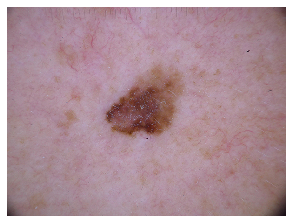

In [0]:
img = PILImage.create(img_fn); 
print(img.shape)
img.show() 

La clase `Transforms` nos permite poder hacer trasformaciones con los datos de forma mas sencilla en Fastai. 
En este caso convertiremos la img en un `Tensor`

In [0]:
tconv = ToTensor()
img_tensor = tconv(img); type(img_tensor)

fastai2.torch_core.TensorImage

In [0]:
img_tensor.shape, img_tensor.max(), img_tensor.min() 

(torch.Size([3, 450, 600]),
 TensorImage(241, dtype=torch.uint8),
 TensorImage(1, dtype=torch.uint8))

Para poder extraer las etiquetas de los datos, creamos una funcion que captura el nombre del archivo y retorna su etiqueta 

In [0]:
get_labels = lambda x, df: df.loc[x.name[:-4],'Labels'].lstrip()
get_labels = partial(get_labels, df=ground_truth)
get_labels(img_fn) # Dado el nombre y direccion del archivo de imagen, retorna la etiqueta correspondiente

'MEL'

Gracias a `Pipeline` nosotros podemos crear un proceso de procesado de los datos de forma muy sencilla. Primero utilizamos `PILImage.create` para importar la imagen y depues `ToTensor` para convertirla a Tensor.

In [0]:
pipe = Pipeline([PILImage.create, ToTensor])
img = pipe(img_fn)

In [0]:
img

TensorImage([[[ 92,  96, 100,  ...,  70,  65,  62],
         [ 95, 100, 100,  ...,  72,  67,  62],
         [100, 103, 104,  ...,  71,  70,  67],
         ...,
         [ 44,  48,  49,  ...,  28,  27,  28],
         [ 41,  45,  50,  ...,  28,  28,  29],
         [ 41,  43,  47,  ...,  27,  28,  28]],

        [[ 76,  80,  84,  ...,  43,  40,  41],
         [ 78,  84,  87,  ...,  47,  45,  41],
         [ 83,  87,  88,  ...,  46,  45,  41],
         ...,
         [ 31,  33,  32,  ...,  17,  16,  16],
         [ 30,  32,  35,  ...,  17,  17,  16],
         [ 30,  30,  32,  ...,  16,  17,  17]],

        [[ 86,  90,  94,  ...,  48,  44,  48],
         [ 88,  94,  96,  ...,  51,  48,  48],
         [ 91,  97,  98,  ...,  52,  49,  50],
         ...,
         [ 40,  38,  38,  ...,  23,  20,  20],
         [ 38,  39,  40,  ...,  21,  21,  23],
         [ 36,  37,  37,  ...,  20,  21,  23]]], dtype=torch.uint8)

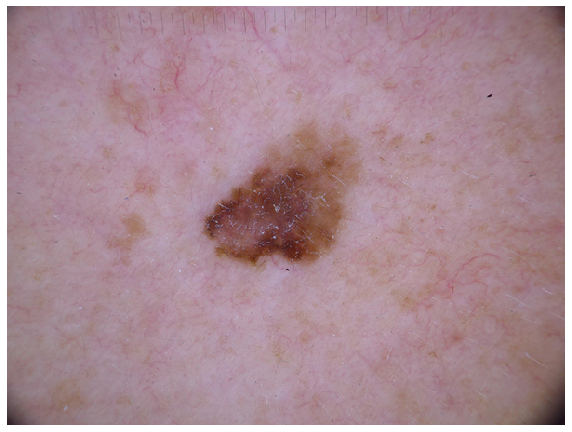

In [0]:
pipe.show(img, figsize=(10,10))

Un paso muy importante es poder obtener la lista de las direcciones los archivos de las imagenes, con `get_image_files` nostros podemos extarer de forma recursiva los archivos de imagen de un directorio. 

In [0]:
items = get_image_files(train_path)
items[:2]

(#2) [Path('skin_data/ISIC_2019_Training_Input/ISIC_0030898.jpg'),Path('skin_data/ISIC_2019_Training_Input/ISIC_0032986.jpg')]

Un paso muy importante en el deep learning es poder dividir los datos en *entrenamiento* y *validacion*. 

La funcion `RandomSplitter` se encarga de dividir de forma aleatoria el conjunto de datos.

In [0]:
splitter = RandomSplitter()(items)
splitter

((#20265) [4670,21235,7509,13934,10113,7782,13464,9131,24457,8156...],
 (#5066) [23087,18168,11723,2677,15,16538,10263,12748,9448,1604...])

#### Funcionalidad de Fastai 

In [0]:
def resized_image(fn:Path, sz=224):
  """Funcion para cambiar el tamaño de la imagen"""
  img = Image.open(fn).convert('RGB').resize((sz, sz))
  return tensor(array(img)).permute(2,0,1).float()/255

Es necesario tener un tamaño constante en las imagenes para asegurarnos que nuestro modelo rinda mejor.

In [0]:
img = resized_image(img_fn); img.shape

torch.Size([3, 224, 224])

Aqui solo visualizamos las imagenes con su metadata haciendo uso y ventaja de la libreria.

In [0]:
class SkinImage(Tuple):
  def show(self, ctx=None, **kwargs): 
    show_titled_image(self, ctx=ctx, **kwargs)

In [0]:
def show_metadata(fn:Path, metadata=mt):
    get_meta = lambda fn, metadata: [f"{i}: {mt.loc[str(fn.name[:-4]), i]}" for i in mt.columns]
    meta =  get_meta(fn, metadata)
    for i, t in enumerate(meta):
      plt.figtext(0.5, 0.02+(i/40), str(t), wrap=True, 
                  horizontalalignment = 'center', fontsize=12, weight='semibold')

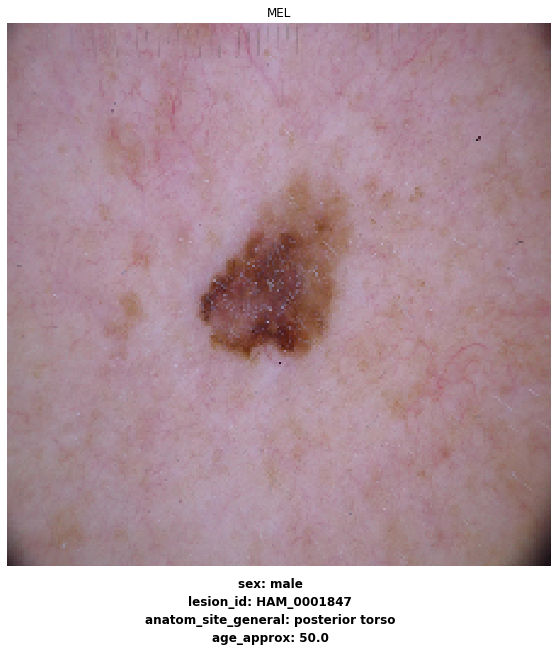

In [0]:
SkinImage(img, get_labels(img_fn)).show(figsize=(10,10))
show_metadata(img_fn)

### Transform
La clase `Trasform` cuenta con dos metodos `encodes` y `decodes` los cuales se encargan de *trasformar* los datos y *revertirlos* as su estado original. Esto nos da una gran ventaja ya que hace el procesado de datos mas sencillo y manejable.  

In [0]:
class SkinTfm(Transform):
  def __init__(self, vocab, o2i, lblr): self.vocab, self.o2i, self.lblr = vocab, o2i, lblr
  def encodes(self, o): return resized_image(o), self.o2i[self.lblr(o)]
  def decodes(self, x): return SkinImage(x[0], x[1])

In [0]:
labeller= get_labels # funcion que extrae las etiquetas
vocab = list(map(get_labels, items[splitter[0]])) # lista de las etiquetas 
vocab, o2i = uniqueify(vocab, sort=True, bidir=True) # funcion que asigna un numero unico a cada etiqueta
skin = SkinTfm(vocab, o2i, labeller) # Funcion Trasform 

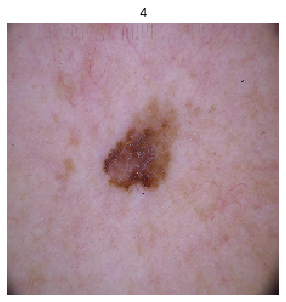

In [0]:
x, y = skin(img_fn) # retorna lo que hay en encodes
dec = skin.decodes((x,y))
dec.show()

En esta parte empaquetamos todo dentro de una misma clase para hacer mas facil el manejo de datos. 

In [0]:
class SkinTfm(Transform):
  def __init__(self, items, train_idx): 
    self.items, self.train_idx = items, train_idx
    self.labeller= get_labels
    vocab =  map(self.labeller, items[train_idx[0]])
    self.vocab, self.o2i = uniqueify(vocab, sort=True, bidir=True)  
  
  def encodes(self, i): 
    o = self.items[i]
    return resized_image(o), self.o2i[self.labeller(o)]
  
  def decodes(self, x): return SkinImage(x[0], x[1])

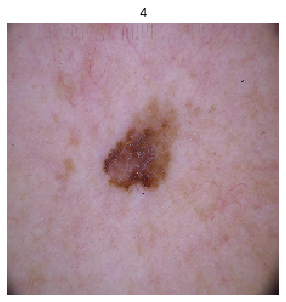

In [0]:
skin = SkinTfm(items, splitter)
x,y = skin(0)
skin.decodes((x,y)).show()

### Datasets
La clase `Datasets` utiliza una lista de listas de *trasformaciones* (o lista de `pipelines`) a nuestros archivos(`items`), hace de sencilla la separacion y manejo de la `imagen` y su `etiqueta` o `label`. 

* La primera lista de listas se encarga de las tranformaciones para la imagen.
* La segunda se encarga de extraer la etiqueta(funcion de `labeller`) y despues asignarle un numero a cada clase o categoria(fucnion de `Categorize`)

In [0]:
tfms= [[PILImage.create], [labeller, Categorize]] # Tranformacion de [ [Imagen], [Etiquetas o labels]]
dsrc = Datasets(items, tfms, splits = splitter)


In [0]:
x , y = dsrc[0]
dsrc.decode((x,y))

(PILImage mode=RGB size=600x450, 'MEL')

In [0]:
# specify subset
a, b  = dsrc.subset(0)[1]
a.shape, b

((1024, 1024), TensorCategory(5))

Ejemplo que como podemos utilizar `Transform` para procesar nuestros datos de forma mas sencilla

In [0]:
class ImageResizer(Transform):
  _order= 10
  def __init__(self, size=224, resample= Image.BILINEAR, **kwargs):
    self.size  = (size, size)
    self.resample = resample

  def encodes(self,o:PILImage): return o.resize(self.size, resample=self.resample)
  def encodes(self,o:PILMask) : return o.resize(self.size, resample=Image.NEAREST)  

In [0]:
tfms= [[PILImage.create, ImageResizer(224), ToTensor, IntToFloatTensor],
       [labeller, Categorize]]
dsrc = Datasets(items,tfms, splits= splitter)

In [0]:
t = dsrc[0]
type(t[0]),type(t[1])

(fastai2.torch_core.TensorImage, fastai2.torch_core.TensorCategory)

In [0]:
x,y = dsrc.decode(t)
x.shape,y

(torch.Size([3, 224, 224]), 'MEL')

La clase `TfmDL` se encarga de tomar los archivos de datos y retornar segmentos(*batch*) par de imagen y etiqueta. 


```
for imagen, label in dataloader:
  preds = model(imagen)
  ...
```



In [0]:
tfms= [[PILImage.create], [get_labels, Categorize]]
dsrc = Datasets(items,tfms, splits= splitter)
tdl  = TfmdDL(dsrc, bs=32, after_item=[ImageResizer(224), ToTensor, IntToFloatTensor])

In [0]:
t = tdl.one_batch()
t[0].shape

torch.Size([32, 3, 224, 224])

In [0]:
x,y = tdl.decode_batch(t)[0]
x.shape, y

(torch.Size([3, 224, 224]), 'MEL')

Una de las grandes ventajas de `TfmDL` es que podemos aplicar transformaciones en el GPU y esto hace increiblemente mas rapido el procesado de las imagenes. 

### Aumentacion de datos
Esta es una tecnica la cual se encarga de adquirir variaciones de los datos para obtener mas datos y que nuestro modelo funcione mejor.
Un ejemplo de aumetacion de datos es voltear la imagen por 180 grados o ponerla en blanco y negro.
![](https://cdn-images-1.medium.com/max/1013/1*rvwzKkvhlDN3Wo_4Oay_4Q.png)
`aug_transforms` se encarga de la aumentacion de los datos.  

In [0]:
item_img_tfms= [ImageResizer(224), ToTensor]
gpu_tfms = [IntToFloatTensor, *aug_transforms()]
trn_dl  = TfmdDL(dsrc,bs=32, after_item=item_img_tfms, 
              after_batch=gpu_tfms, device=default_device())

In [0]:
t = trn_dl.one_batch()
t[0].shape

torch.Size([32, 3, 224, 224])

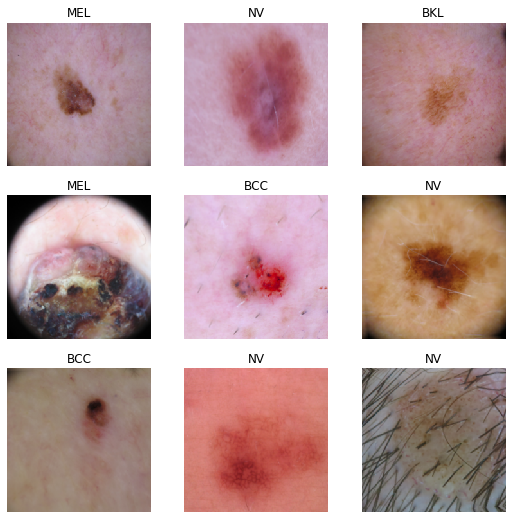

In [0]:
_,axs = plt.subplots(3,3, figsize=(9,9))
trn_dl.show_batch(ctxs=axs.flatten())

 `.dataloaders` maneja todo el proceso desde un `TfmDL`

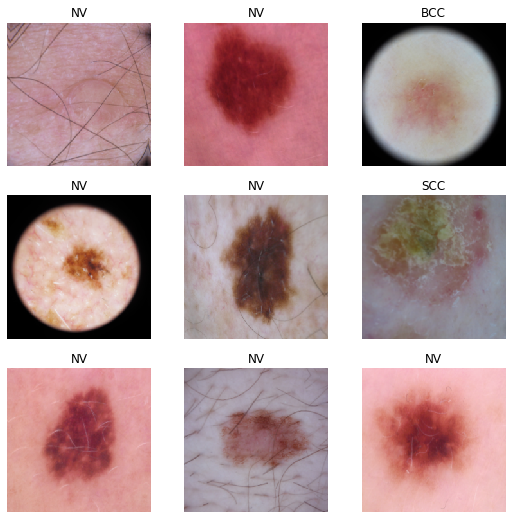

In [0]:
dbch = dsrc.dataloaders(bs=32, num_workers=4, after_item=item_img_tfms, 
                      after_batch=gpu_tfms)   
dbch.show_batch()

## Entrenamiento
Este es el proceso en el cual el algoritmo aprende los patrones en los datos para poder clasificar las imagenes. 

### Adquisicion de Datos y Procesado

In [0]:
items = get_image_files(train_path)
splitter = RandomSplitter()(items)

item_img_tfms= [ImageResizer(224), ToTensor]
gpu_tfms = [IntToFloatTensor, *aug_transforms(flip_vert=True)]
tfms= [[PILImage.create], [get_labels, Categorize]]

dsrc = Datasets(items, tfms, splits= splitter)
data = dsrc.dataloaders(bs=64, num_workers=4, after_item=item_img_tfms, after_batch=gpu_tfms, device=default_device())

### Creacion del modelo(Resnet34) de clasificacion 
`cnn_learner` se encarga de tomar los datos(`data`), utiliza el modelo(`Resnet34`), una funcion de error(`loss_func: Cross Entropy`) y un algoritmo de optimizacion(`ADAM`) para poder entrenar la red neuronal.

In [0]:
learner = cnn_learner(data, resnet34, metrics=[accuracy])

El metodo `.lr_find()` se encarga de encontrar el *learning rate* mas optimo. Lo que hace es que entrena sobre un *batch* del conjunto entrenamiento mientras incrementa el *learning rate* y captura como cambia la funcion de error. De esyta forma elejimos al *LR* mas optimo como aquel que tiene la mayor pendiente(*1e-2*).

(0.010000000149011612, 5.248074330665986e-07)

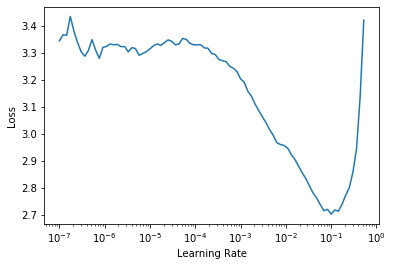

In [0]:
learner.lr_find()

El metodo `fit_one_cycle` se encarga de entrenar al algoritmo y encontrar los parametros que tengan el minimo error de la funcion.

In [0]:
learner.fit_one_cycle(10, 1e-2) 

epoch,train_loss,valid_loss,accuracy,time
0,1.175904,0.976611,0.669562,06:52
1,1.018079,0.968079,0.673707,06:49
2,0.916784,0.874423,0.699171,06:43
3,0.879049,0.817462,0.702921,06:46
4,0.805097,1.007388,0.673707,06:47
5,0.776037,0.780847,0.720687,06:45
6,0.728252,0.772605,0.718516,06:57
7,0.677464,0.684373,0.756613,06:49
8,0.645602,0.683735,0.754244,06:53
9,0.624158,0.667490,0.760758,06:51


In [0]:
learner.fit_one_cycle(4,1e-2) #74

epoch,train_loss,valid_loss,accuracy,time
0,0.756536,0.818052,0.698776,07:15
1,0.755462,0.704751,0.745559,07:08
2,0.724498,0.691608,0.741808,07:03
3,0.650919,0.654893,0.760561,07:01


In [0]:
learner.save('stage-1-resnet34-76acc') #guardamos los parametros de nuestro modelo

In [0]:
learner.unfreeze() 

(5.754399353463669e-07, 3.019951861915615e-07)

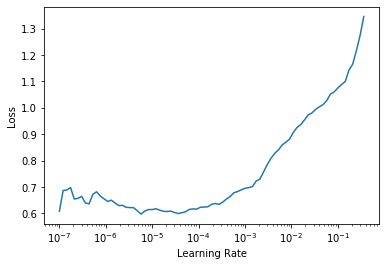

In [0]:
learner.lr_find()

In [0]:
learner.fit_one_cycle(15, slice(1e-5, 1e-4, 1e-3)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.623717,0.675933,0.761350,07:20
1,0.646112,0.669761,0.762140,07:30
2,0.625960,0.685838,0.748322,07:41
3,0.606916,0.649816,0.772996,07:51
4,0.587674,0.625817,0.777339,07:57
5,0.543394,0.634509,0.775365,07:51
6,0.512875,0.631967,0.783261,07:39
7,0.496378,0.586635,0.798460,07:44
8,0.460946,0.563627,0.802803,07:58
9,0.441094,0.548609,0.811094,08:03


In [0]:
learner.save('stage-2-resnet34-81acc')

In [0]:
learner.load('stage-2-resnet34-81acc')

## Evaluacion
La evaluacion es una de las fases mas importantes ya que determina si estamos cerca de cumplir nuestro objetivo. 

En este caso evaluaremos distintas metricas como la **matriz de confusion** .




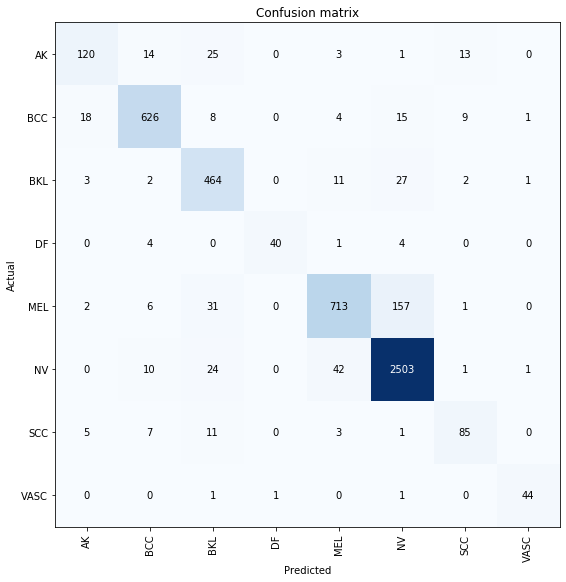

In [0]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(10,8))

In [0]:
# Predictions of the validation data
preds, y_true=learner.get_preds()
y_true.shape, preds.shape

(torch.Size([5066]), torch.Size([5066, 8]))

In [0]:
y_true=y_true.numpy() 
preds=np.argmax(preds.numpy(), axis=-1)
y_true.shape, preds.shape

((5066,), (5066,))

In [0]:
# Reporte de metricas de clasificacion
classes = list(data.vocab)
report = classification_report(y_true, preds, target_names=classes)
print(report)

              precision    recall  f1-score   support

          AK       0.81      0.68      0.74       176
         BCC       0.94      0.92      0.93       681
         BKL       0.82      0.91      0.86       510
          DF       0.98      0.82      0.89        49
         MEL       0.92      0.78      0.85       910
          NV       0.92      0.97      0.95      2581
         SCC       0.77      0.76      0.76       112
        VASC       0.94      0.94      0.94        47

    accuracy                           0.91      5066
   macro avg       0.89      0.85      0.86      5066
weighted avg       0.91      0.91      0.91      5066



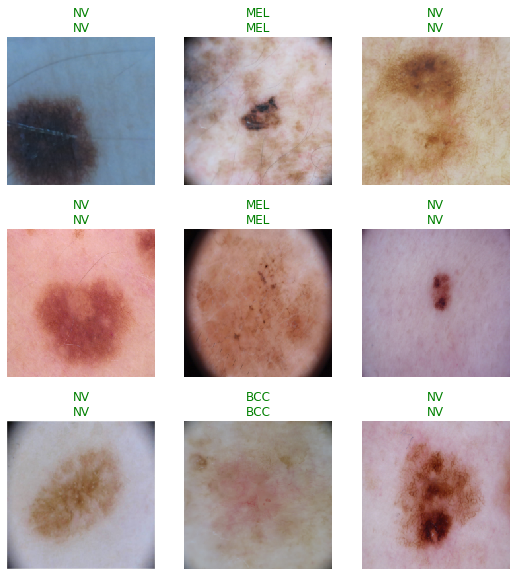

In [0]:
learner.show_results()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


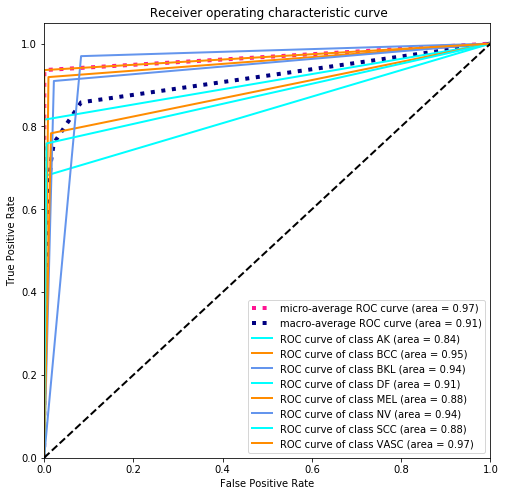

In [0]:
from scipy import interp
from itertools import cycle


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=len(classes)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_true))[:, i], np.array(pd.get_dummies(preds))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(np.array(pd.get_dummies(y_true))[:, i], np.array(pd.get_dummies(preds))[:, i])
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for c,i, color in zip(classes,range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(c, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

Average precision score, micro-averaged over all classes: 0.83


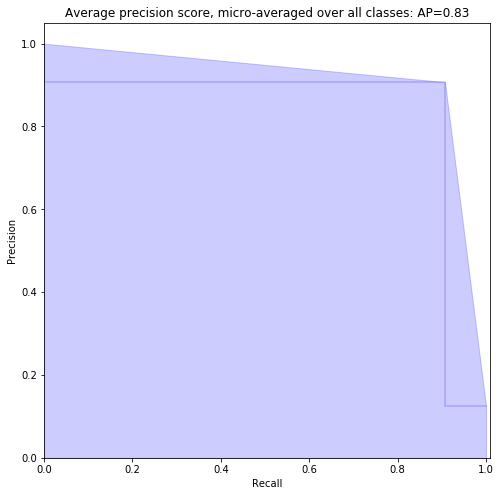

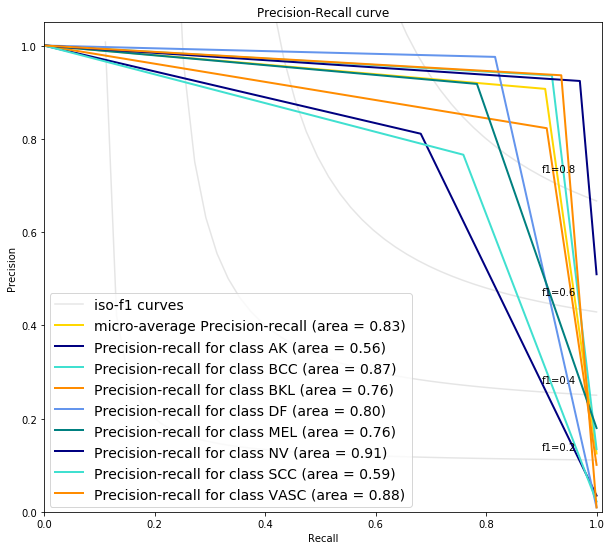

In [0]:
from sklearn.metrics import precision_recall_curve,average_precision_score
from inspect import signature


def pr_curve(Y_test,y_score, classes, micro=True,isof1=True):
  precision = dict()
  recall = dict()
  average_precision = dict()
  n_classes=len(classes)
  for i in range(n_classes):
      precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                          y_score[:, i])
      average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

  # A "micro-average": quantifying score on all classes jointly
  precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
      y_score.ravel())
  average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                       average="micro")
  print('Average precision score, micro-averaged over all classes: {0:0.2f}'
        .format(average_precision["micro"]))
  
  if micro:
    plt.figure(figsize=(8, 8))
    plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.01])
    plt.title(
        'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
        .format(average_precision["micro"]))
    
  if isof1:
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

    plt.figure(figsize=(10, 10))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')
    l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))

    for c,i, color in zip(classes,range(n_classes), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                      ''.format(c, average_precision[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.2)
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(lines, labels, loc=(0.01, 0.01), prop=dict(size=14))
  
pr_curve(np.array(pd.get_dummies(y_true)), np.array(pd.get_dummies(preds)), classes)
  